<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Lab_5_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab \#5: Linear Regression**
---

**Description:**  In this lab, you will practice implementing linear regression models on three datasets. Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. Linear regression is widely used in various fields such as economics, finance, social sciences, and engineering for making predictions, understanding the nature of relationships between variables, and identifying important factors that contribute to the variability of the data. It is a fundamental tool for data analysis and is often one of the first models explored when working with a new dataset.

</br>

**About Datasets:**
- **Boston Housing Dataset**: The Boston Housing Dataset is a collection of data that contains information on various features of houses in the Boston area, such as the number of rooms, the age of the house, and the distance to employment centers. The dataset is often used for regression analysis and is a popular benchmark dataset for machine learning algorithms.

- **Diabetes Dataset**: The diabetes dataset includes various patient features such as BMI, age, blood pressure, and glucose levels, which can be used to predict disease progression in diabetic patients.

- **California Housing Dataset**: The California Housing Dataset is a collection of data containing information on the median house value and other features of census block groups in California.
</br>

### **Lab Structure**
**Part 1**: [Boston Housing Dataset](#p1)

**Part 2**: [Diabetes Dataset](#p2)

**Part 3**: [[OPTIONAL] California Housing Dataset](#p3)

**Part 4**: [[ADDITIONAL PRACTICE] Zoo Animal Classification Dataset](#p4)

</br>

**Goals**: By the end of this lab, you will:
* Implement a linear regression model on your own.
* Test and use linear regression models to predict disease progression and housing prices.
</br> 

### **Cheat Sheets**
[EDA cheatsheet](https://drive.google.com/file/d/1ZZnIzgcT8dYcGwWVAR9DDFIwGXTGbIiU/view?usp=sharing)

**Run the code below before continuing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

<a name="p1"></a>

## **Part 1: Boston Housing Dataset [Practice Together]**
---
The following dataset contains information on Boston housing and contains 13 numerical features and a numerical target. **Using several features, we are going to build a housing value predictor for Boston in the 1970s.** 

The features are as follows:

* `CRIM`: Per capita crime rate by town
* `ZN`: Proportion of residential land zoned for lots over 25,000 sq. ft
* `INDU`S: Proportion of non-retail business acres per town
* `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `NOX`: Nitric oxide concentration (parts per 10 million)
* `RM`: Average number of rooms per dwelling
* `AGE`: Proportion of owner-occupied units built prior to 1940
* `DIS`: Weighted distances to five Boston employment centers
* `RA`D: Index of accessibility to radial highways
* `TAX`: Full-value property tax rate per 10,000 dolalrs
* `PTRATIO`: Pupil-teacher ratio by town
* `B`: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* `LSTAT`: Percentage of lower status of the population
* **`TARGET`** (target that needs to be added): Median value of owner-occupied homes in $1000s. *You need to add this column after loading the boston data from sklearn datasets*.

<br>

**NOTE:** The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices. This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption. Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML.

### **Step #1: Load the data**

In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat':'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Step #2: Decide independent and dependent variables**
We are going to use "Rooms per dwelling" (`RM`) and "Percentage of lower status of the population" (`LSTAT`) as our dependent variables for predicting `TARGET`. Our target is the median value of owner-occupied homes. **With these values, we are building a housing value predictor for Boston in the 1970s.**

In [ ]:
df[["RM","LSTAT", "TARGET"]]

,RM,LSTAT,TARGET
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0



**Before we continue, create two graphs. One with `LSTAT` and the target, and another with `RM` and the target to explore the relationship between the variables further.**

#### **Solution**

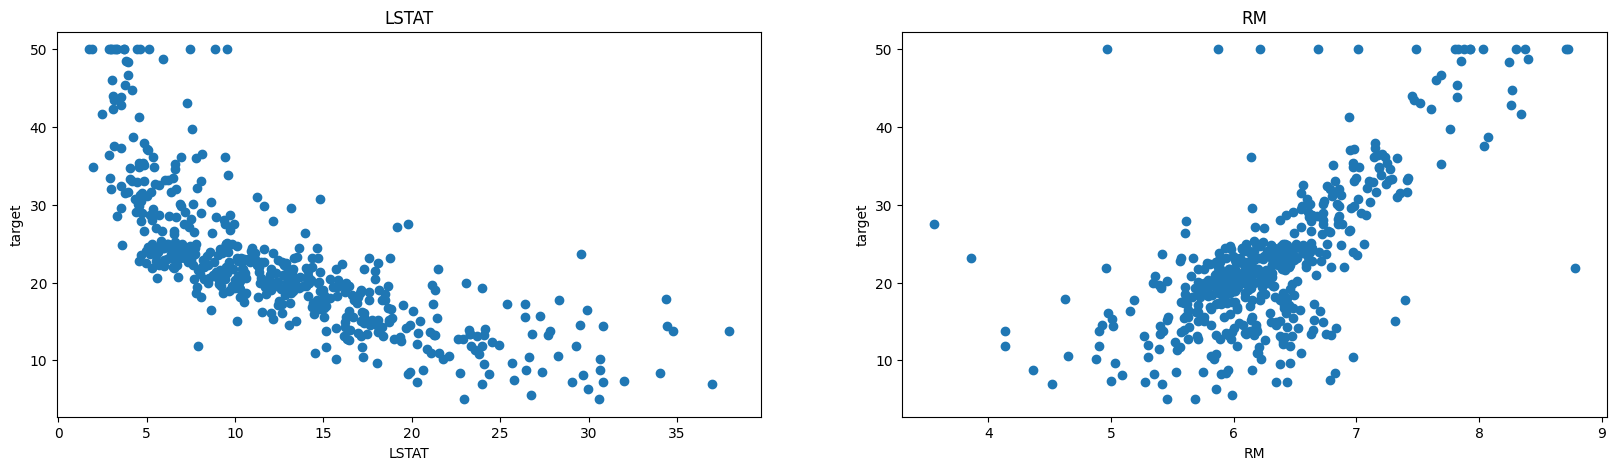

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['TARGET']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

### **Step #3: Split data into training and testing data**


#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[["RM", "LSTAT"]], df[["TARGET"]], test_size=0.2, random_state=42)

### **Step #4: Import your algorithm**
Import sklearn's linear regression algorithm.

In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### **Step #5: Initialize your model and set hyperparameters**
Linear regression takes no hyperparameters, so just initialize the model.

#### **Solution**

In [ ]:
# initialize
reg = LinearRegression()

### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**


#### **Solution**

In [ ]:
# fit
reg.fit(X_train, y_train)
# predict
pred = reg.predict(X_test)

**Create a visualization**

Use `y_test` and your `prediction` (x and y on graph) from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be:
```
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
```

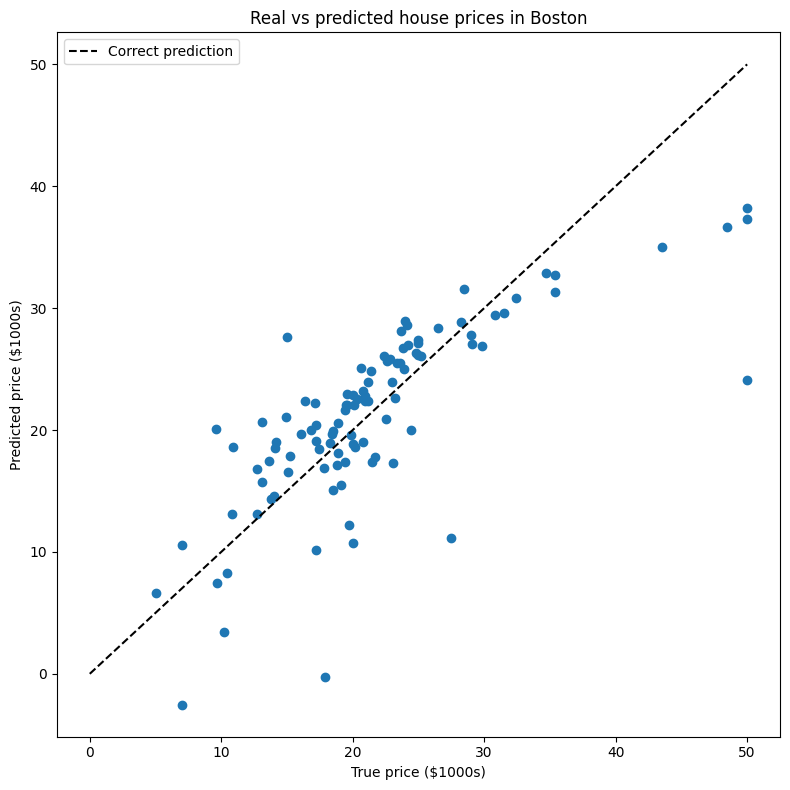

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title("Real vs predicted house prices in Boston")
plt.legend()
plt.tight_layout()

### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.

#### **Solution**

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))


mean squared:  31.243290601783627
R2 score:  0.5739577415025858


### **Step #8: Use the model**
Using the model we created, predict the price of two houses in Boston:

* House 1:  7 `RM` and `LSTAT` is 5.0%

* House 2:  6 `RM` and `LSTAT` is 4.0%

**Note:** you must create a dataframe containing with the information of the new houses:

```python
new_houses = pd.DataFrame(enter_new_house_data_here, columns =["RM", "LSTAT"])
```

This `new_houses` variable can then be placed directly into the `model.predict()` function.

#### **Solution**

In [ ]:
new_houses = pd.DataFrame([[7,5], [6,4]], columns =["RM", "LSTAT"])
new_prediction = reg.predict(new_houses)
print('prediction: ', new_prediction)

prediction:  [[31.25202152]
 [26.41942131]]


<a name="p2"></a>

## **Part 2: Diabetes Dataset**
---
This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels that are useful in predicting the diabetes disease progression in patients. We will be looking at these variables that will be used to help predict disease progression in diabetic patients. Note that similar to the above, we will be using the 8-steps of the Machine Learning Process. 

**Steps of the ML Process:**
1. **Load the data**
2. **Decide independent variables and dependent variables**
3. **Split the data into training and test data**
4. **Import the model**
5. **Initialize the model and set hyperparameters**
6. **Fit your model, test on the testing data, and create a visualization if applicable**
7. **Evaluate your model**
8. **Use the model**


### **Step #1: Load the data**
The following code will load the data. Turn this into a date frame.
```python
diabetes = datasets.load_diabetes()
```
Add a column called `TARGET` with the target data (`diabetes.target`).  In this case, the target is a measure for disease progression.

In [ ]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
## YOUR CODE HERE ##
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


#### **Solution**

In [ ]:
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['TARGET'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### **Step #2: Decide independent and dependent variables**
Here we would like to use the `age` `bmi` and `bp` columns as our dependent variables and the `TARGET` as our independent variable.

We are building a predictor of disease progression.


In [ ]:
df[['age', 'bmi', 'bp', "TARGET"]]

,age,bmi,bp,TARGET
0,0.038076,0.061696,0.021872,151.0
1,-0.001882,-0.051474,-0.026328,75.0
2,0.085299,0.044451,-0.005670,141.0
3,-0.089063,-0.011595,-0.036656,206.0
4,0.005383,-0.036385,0.021872,135.0
...,...,...,...,...
437,0.041708,0.019662,0.059744,178.0
438,-0.005515,-0.015906,-0.067642,104.0
439,0.041708,-0.015906,0.017293,132.0
440,-0.045472,0.039062,0.001215,220.0


### **Step #3: Split data into training and testing data**
Use `age`, `bmi`, and `bp` for our independent variables.

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['age', 'bmi', 'bp']], df['TARGET'], test_size=0.2)

### **Step #4: Import your model**


#### **Solution**

In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### **Step #5: Initialize your model and set hyperparameters**
Linear regression takes no hyperparameters, so just initialize the model.

#### **Solution**

In [ ]:
LR = LinearRegression()

### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

#### **Solution**

In [ ]:
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

**Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

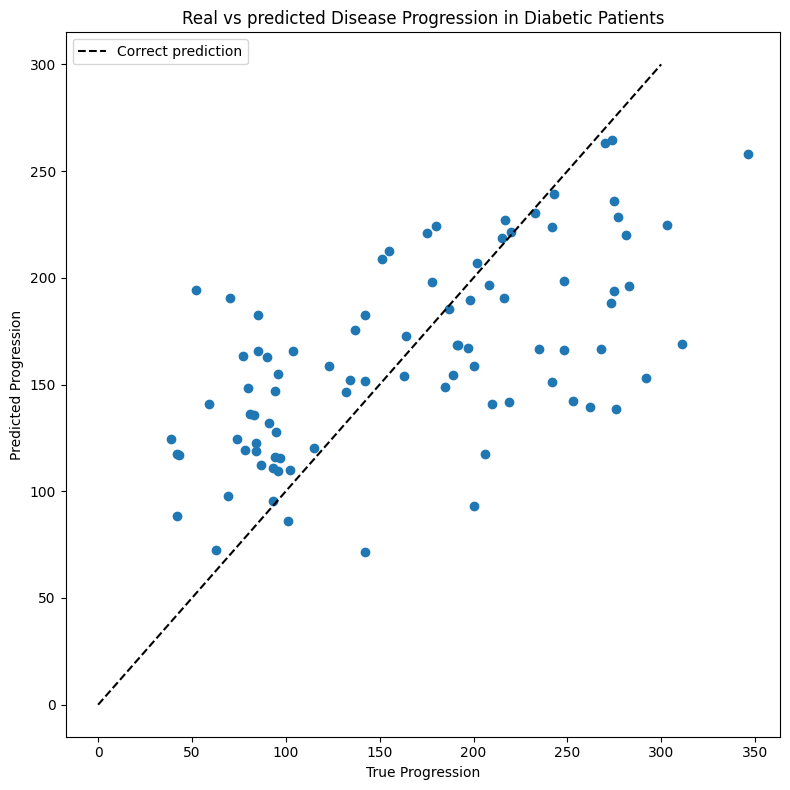

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True Progression')
plt.ylabel('Predicted Progression')
plt.title("Real vs predicted Disease Progression in Diabetic Patients")
plt.legend()
plt.tight_layout()

### **Step #7: Evaluate your model**


#### **Solution**

In [ ]:
from sklearn.metrics import mean_squared_error
print('mean squared: ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
print('r squared: ', r2_score(y_test, pred))

mean squared:  3866.5107031688467
r squared:  0.3849438729213228


### **Step #8: Use the model**
Using the model we created, predict the disease progression of two new patients:

* Patient 1:  0.0045 `age` 0.053 `bmi` 0.014 `bp`

* Patient 2:  0.0039 `age` -0.012 `bmi` 0.018 `bp`

**Note:** you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["age", "bmi", "bp"])
```

In [ ]:
# Prediction
new_patient_data = pd.DataFrame([[0.0045, 0.053, 0.014],[0.0039, -0.012, 0.018]], columns =["age", "bmi", "bp"])
disease_prediction = LR.predict(new_patient_data)
print('prediction: ', disease_prediction)

prediction:  [198.35971636 149.19121772]


<a name="p3"></a>

## **Part 3: California Housing Dataset [Optional]**
---
This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people)

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). We will use the data to help make a model that will predict the median house value in California in 1990.

**Specifically create a linear regression model and predict the median house value of a district that has: 7.2 average rooms, 1.5 average bedrooms, 51 years old, located at 38.1 Latitude, -121.08 Longitude. *Try different independent variables for your model and see how the accuracy changes.***


### **Step #1: Load the data**

In [ ]:
#import relevant packages
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1
cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target


### **Step #2: Decide independent and dependent variables**
The dependent variables will be the `TARGET`, so find the best independent variables using `.var()` and `.corr()`.

In [ ]:
# var

In [ ]:
# corr

#### **Solution**

In [ ]:
df.var()

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
TARGET        1.331615e+00
dtype: float64

In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
TARGET,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### **Steps #3-6: Split data, import/initialize your model, fit the model, make a prediction, and create a visualization**

In [ ]:
# 2 - nothing to do here, we just used all columns except for AveRooms

# 3 
X_train, X_test, y_train, y_test = train_test_split(df[['HouseAge',	'AveBedrms','Latitude',	'Longitude']], df['TARGET'], test_size=0.2)

# 4 - 6


In [ ]:
# 6 part two: visualization








#### **Solution**

In [ ]:
# 2 - we just used all columns except for AveRooms

# 3 
X_train, X_test, y_train, y_test = train_test_split(df[['HouseAge',	'AveBedrms','Latitude',	'Longitude']], df['TARGET'], test_size=0.2)

# 4 - 6
LR2 = LinearRegression()
LR2.fit(X=X_train, y=y_train)
test_pred = LR2.predict(X_test)

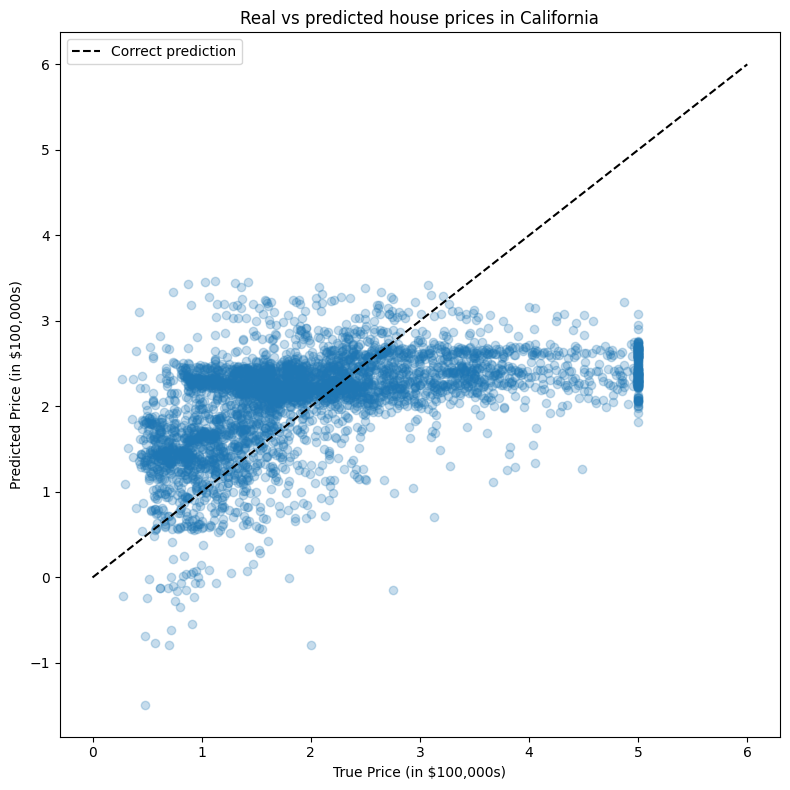

In [ ]:
# 6 part two
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_pred, alpha = 0.25)
plt.plot([0, 6], [0, 6], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True Price (in $100,000s)')
plt.ylabel('Predicted Price (in $100,000s)')
plt.title("Real vs predicted house prices in California")
plt.legend()
plt.tight_layout()

### **Steps #7-8: Evaluate and use the model**

In [ ]:
# 8 


# 9

#### **Solution**

In [ ]:
# 8
print('mean squared: ', mean_squared_error(y_test, test_pred))

#9
LR2.predict(pd.DataFrame([[7.2, 51,38.1,-121.08]], 
                         columns=['HouseAge',	'AveBedrms','Latitude',	'Longitude']))

mean squared:  1.0421671463313136


array([8.73824893])


## [OPTIONAL] **Part 4: Zoo Animal Classification Dataset**
---
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

The features are as follows:


*    `animal_name`: Name of the animal
*   `hair`: Hair presence (1 if present, 0 if not)
- `feathers`: Feather presence (1 if present, 0 if not)
-     `eggs`: Egg-laying ability (1 if yes, 0 if no)
-    ` milk`: Milk production ability (1 if yes, 0 if no)
-     `airborne`: Ability to fly (1 if yes, 0 if no)
-     `aquatic`: Ability to live in water (1 if yes, 0 if no)
- `predator`: Predatory behavior (1 if yes, 0 if no)
- `toothed`: Teeth presence (1 if present, 0 if not)
- `backbone`: Backbone presence (1 if present, 0 if not)
-  `breathes`: Ability to breathe (1 if yes, 0 if no)
- `venomous`: Venom presence (1 if present, 0 if not)
- `fins`: Fin presence (1 if present, 0 if not)
- `legs`: Number of legs (numeric)
- `tail`: Tail presence (1 if present, 0 if not)
- `domestic`: Domestication status (1 if domestic, 0 if not)
- `catsize`: Animal size (1 if cat-size or larger, 0 if smaller)
- `class_type`: Numeric class identifier (1-7)

### **Step #1: Load the data**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Create dataframe
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
df = pd.read_csv(url, names=column_names)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### **Step #2: Decide independent and dependent variables**
We are going to use all features except `animal_name` and `class_type` as our independent variables for predicting class_type.



#### **Solution**

In [ ]:
X = df.drop(['animal_name', 'class_type'], axis=1)
y = df['class_type']

### **Step #3: Split data into training and testing data**

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

### **Step #4: Import your algorithm**
Import sklearn's DecisionTreeClassifier algorithm.

#### **Solution**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### **Step #5: Initialize your model and set hyperparameters**
Initialize the DecisionTreeClassifier model.

#### **Solution**

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

### **Step #6: Fit your model, test on the testing data**

#### **Solution**

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### **Step #7: Evaluate your model**
Use `accuracy_score` as the evaluation metric.

#### **Solution**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9523809523809523


**Reflection question:** How accurately was your algorithm able to predict the type of species?

In [ ]:
''

'Your Answer Here'


''

''

**Congratulations on finishing this notebook!** In this lab, we practiced implementing linear regression models on three datasets: Boston Housing Dataset, Diabetes Dataset, and California Housing Dataset. We learned how to load and explore datasets, split data into training and testing data, and implement a linear regression algorithm in Python using `scikit-learn`.

---
© 2023 The Coding School, All rights reserved